In [90]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

from imblearn.over_sampling import SMOTE

import pickle as pk

In [91]:
# import dataset
df_main = pd.read_csv("E:\\Data_Analysis_Datasets\\ML\\Social_Network_Ads.csv")
df_main.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [92]:
# copy main dataframe
df = df_main.copy()

In [93]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [94]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [95]:
df.shape

(400, 5)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [97]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [98]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [99]:
df.drop('User ID', axis=1, inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


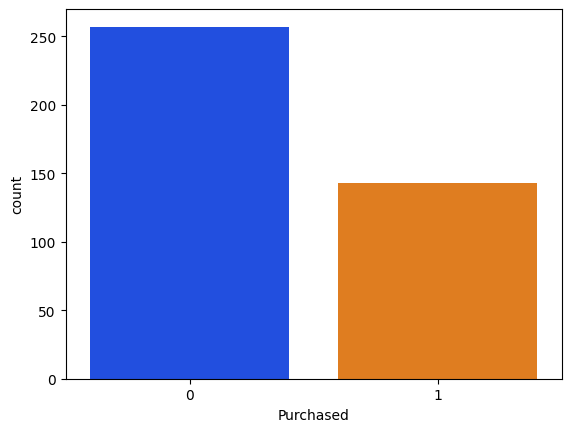

In [100]:
sns.countplot(x='Purchased', data=df, palette='bright')
plt.show()

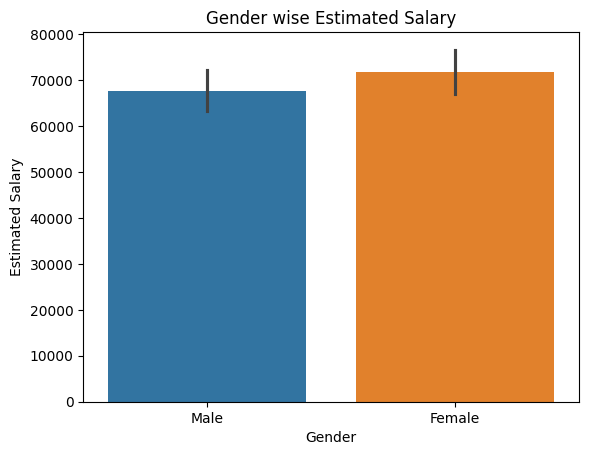

In [101]:
sns.barplot(df, x='Gender', y='EstimatedSalary', hue='Gender')
plt.title("Gender wise Estimated Salary")
plt.xlabel('Gender')
plt.ylabel('Estimated Salary')
plt.show()

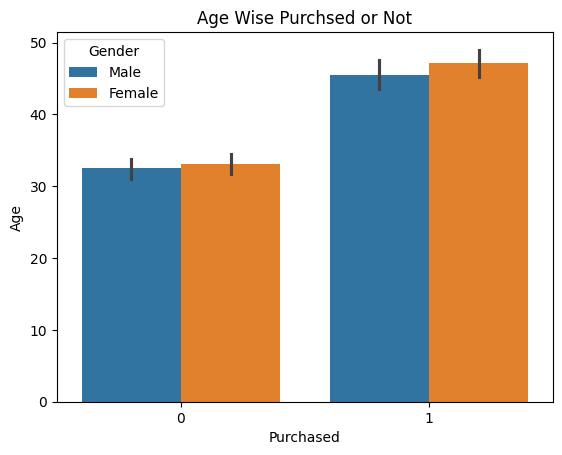

In [102]:
sns.barplot(df, x='Purchased', y='Age', hue='Gender')
plt.title("Age Wise Purchsed or Not")
plt.show()

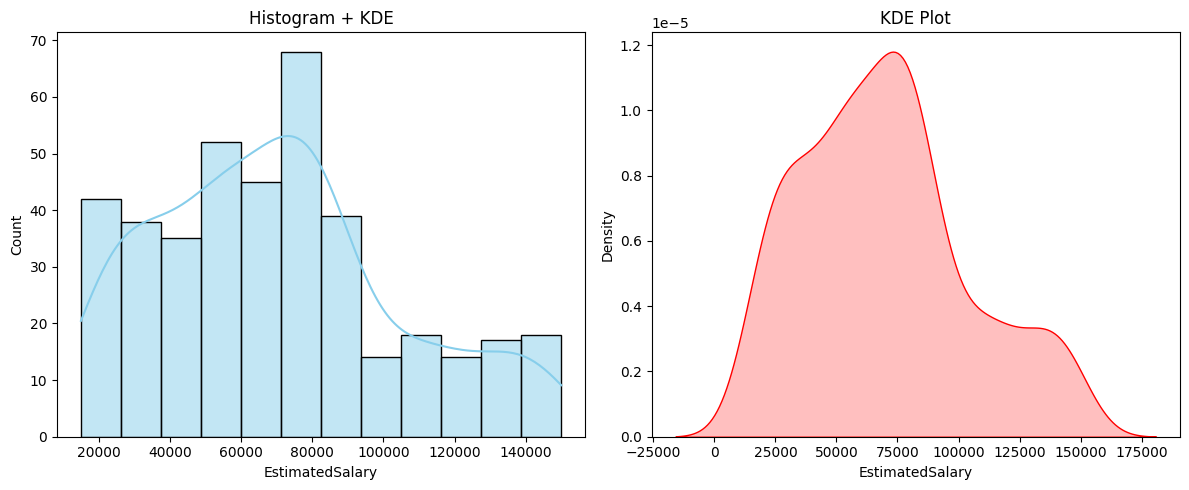

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df['EstimatedSalary'], kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Histogram + KDE")

sns.kdeplot(df['EstimatedSalary'], fill=True, ax=axes[1], color="red")
axes[1].set_title("KDE Plot")

# plt.title("Age Distribution with Histogram + KDE")
plt.tight_layout()
plt.show()


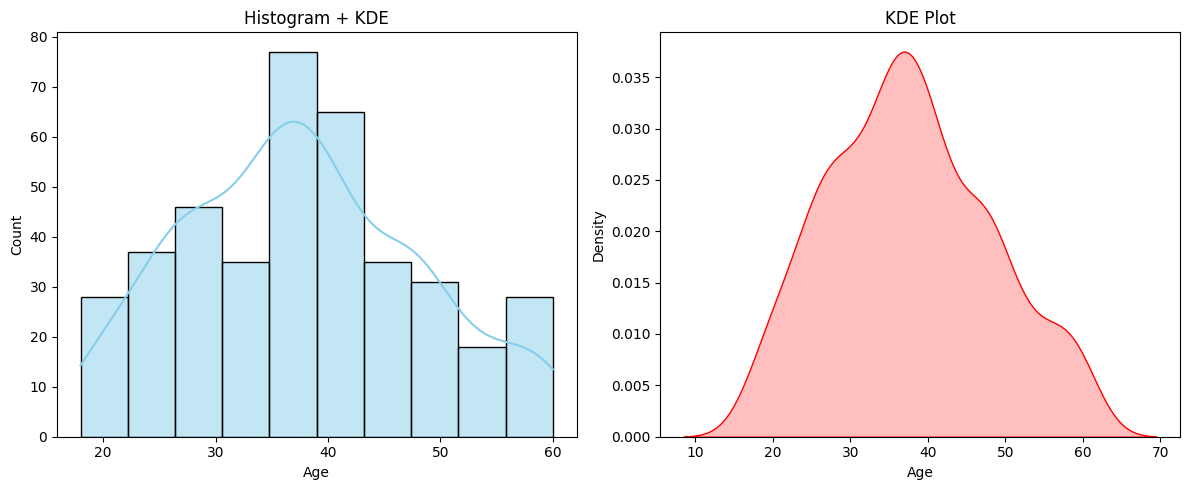

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df['Age'], kde=True, ax=axes[0], color="skyblue")

axes[0].set_title("Histogram + KDE")

sns.kdeplot(df['Age'], fill=True, ax=axes[1], color="red")
axes[1].set_title("KDE Plot")

# plt.title("Age Distribution with Histogram + KDE")
plt.tight_layout()
plt.show()


<Axes: xlabel='EstimatedSalary', ylabel='Proportion'>

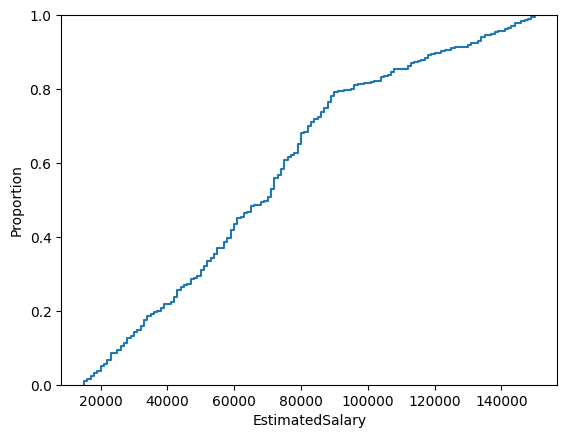

In [105]:
sns.ecdfplot(df['EstimatedSalary'])

<Axes: ylabel='Age'>

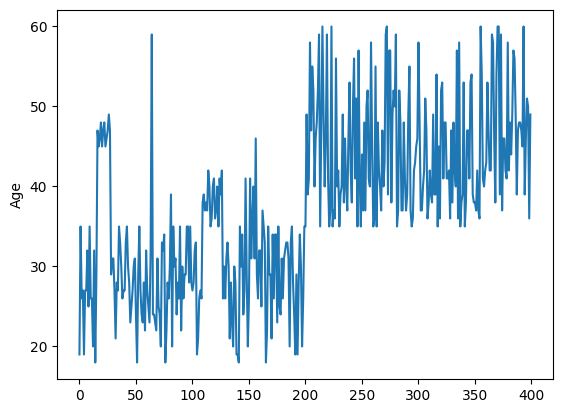

In [106]:
sns.lineplot(df['Age'])

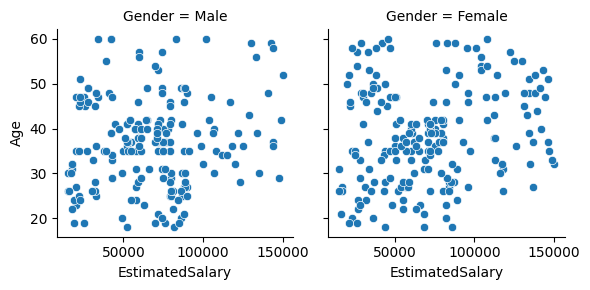

In [107]:
g = sns.FacetGrid(df, col="Gender")
g.map(sns.scatterplot, "EstimatedSalary", "Age")

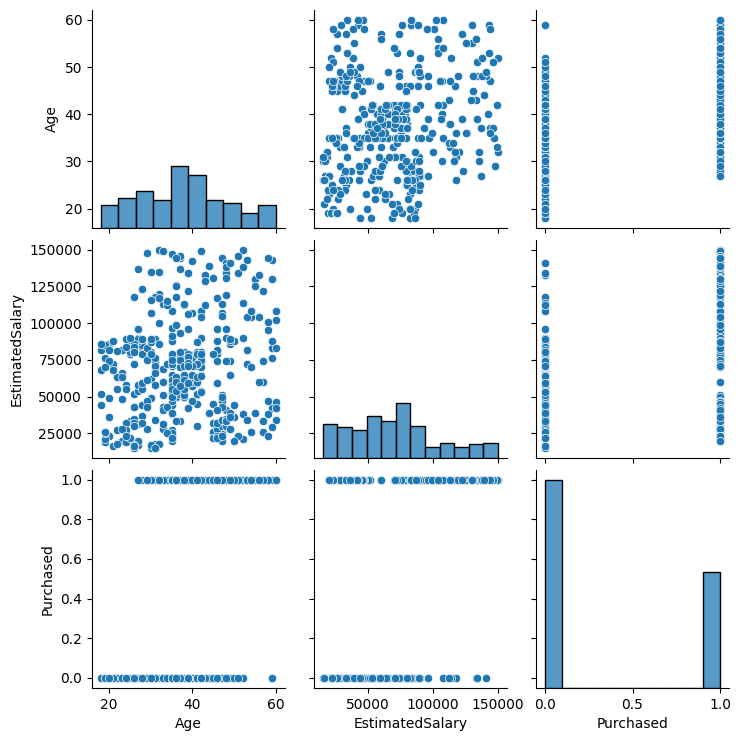

In [108]:
sns.pairplot(df)

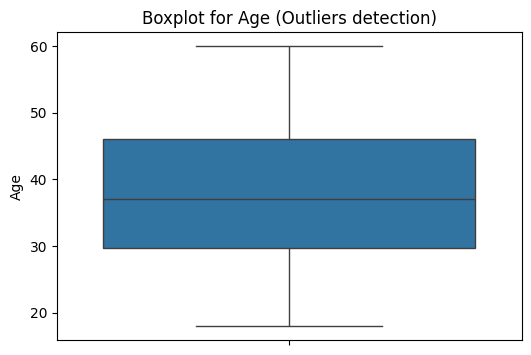

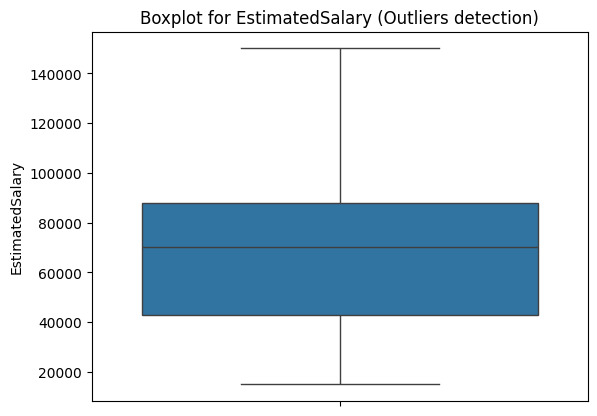

In [109]:
cols = ['Age', 'EstimatedSalary']
plt.figure(figsize=(6,4))
for i in cols:
    sns.boxplot(df[i])
    plt.title(f"Boxplot for {i} (Outliers detection)")
    plt.show()

In [110]:
# Label Encoding
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [111]:
le.classes_

array(['Female', 'Male'], dtype=object)

<Axes: >

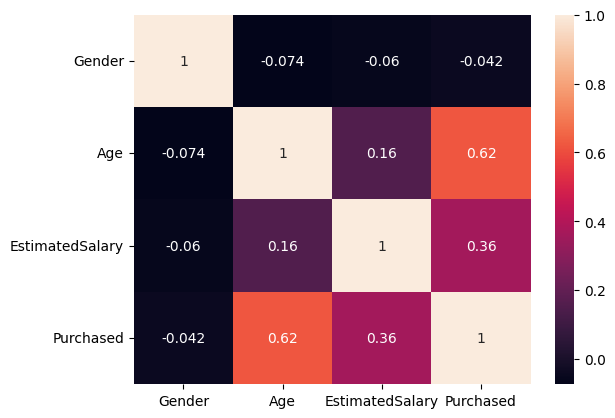

In [112]:
sns.heatmap(df.corr(), annot=True)

In [113]:
sm = SMOTE(sampling_strategy='minority')

In [114]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [115]:
X.shape, y.shape

((400, 3), (400,))

In [116]:
# trainx, trainy = sm.fit_resample(X,y)
X, y = sm.fit_resample(X,y)

<Axes: xlabel='Purchased', ylabel='count'>

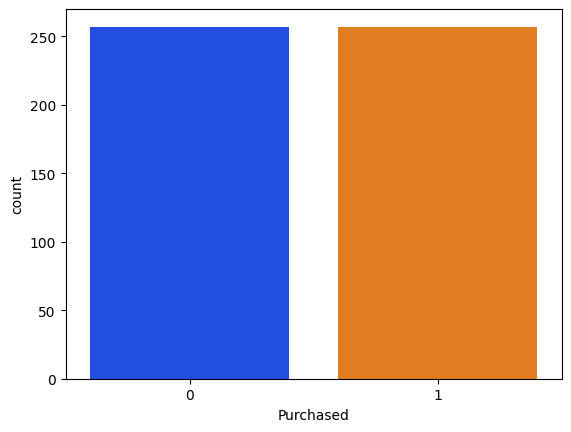

In [117]:
sns.countplot(x=y, palette='bright')
# y.value_counts()

# sns.countplot(x='X', palette='bright')
# plt.show()

In [118]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [119]:
# --- pipeline ---
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logistic", LogisticRegression())
])

In [120]:
# --- Hyperparameter Grid ---
# params = [    
#     {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#     'logistic__C' : np.logspace(-4, 4, 20),
#     'logistic__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
#     'logistic__max_iter' : [100, 1000,2500, 5000]
#     }
# ]

params = {
    'logistic__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'logistic__C' : np.logspace(-4, 4, 20),
    'logistic__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'logistic__max_iter' : [100, 1000,2500, 5000]
}


In [121]:
grid = GridSearchCV(pipeline, param_grid=params, cv=5, verbose=True, n_jobs=-1)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


In [122]:
y_pred = grid.predict(X_test)

In [123]:
print("Best Parametes")
grid.best_params_

Best Parametes


{'logistic__C': np.float64(0.08858667904100823),
 'logistic__max_iter': 100,
 'logistic__penalty': 'l2',
 'logistic__solver': 'lbfgs'}

In [124]:
grid.best_score_

np.float64(0.8468116367910667)

In [125]:
lr = LogisticRegression(C=0.088, max_iter=100, penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)

,penalty,'l1'
,dual,False
,tol,0.0001
,C,0.088
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [126]:
y_pred = lr.predict(X_test)

In [127]:
print("Accuracy Score")
accuracy_score(y_test, y_pred)

Accuracy Score


0.8446601941747572

In [128]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.75      0.84        56
           1       0.76      0.96      0.85        47

    accuracy                           0.84       103
   macro avg       0.86      0.85      0.84       103
weighted avg       0.87      0.84      0.84       103



In [129]:
X_train.sample()

,Gender,Age,EstimatedSalary
47,0,27,54000


In [130]:
input_data = pd.DataFrame([[0, 35, 172000]], columns=['Gender', 'Age', 'EstimatedSalary'])
lr.predict(input_data)

array([1])

In [131]:
# pickel
pk.dump(lr, open("pickle.pkl", 'wb'))